In [2]:
# Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Load preprocessed data
df = pd.read_csv("Data/data_pre.csv", index_col=0)

In [4]:
# Print head
df.head()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines
FL_DATE,,,,,,,,,,,,,,,,,,,,,
FL_DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2416,2059,2300.0,121.0,24.0,2324.0,112.0,8.0,2311,120.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2413,2114,2230.0,76.0,14.0,2244.0,123.0,5.0,15,128.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2412,653,747.0,54.0,14.0,801.0,1003.0,22.0,930,1025.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2411,1810,1922.0,72.0,16.0,1938.0,2157.0,4.0,2136,2201.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2410,1250,1337.0,47.0,12.0,1349.0,1600.0,6.0,1537,1606.0,...,0,0,0,0,0,0,0,0,0,1


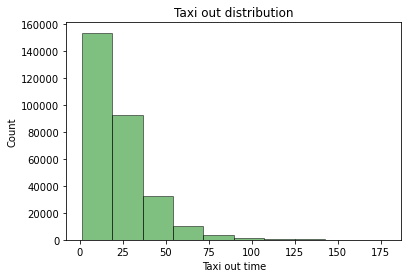

In [5]:
# Plot taxi out time
plt.hist(df["TAXI_OUT"], color='green', alpha=0.5, edgecolor='black')
plt.title('Taxi out distribution')
plt.xlabel('Taxi out time')
plt.ylabel('Count');

### Might follow a Gamma distribution?

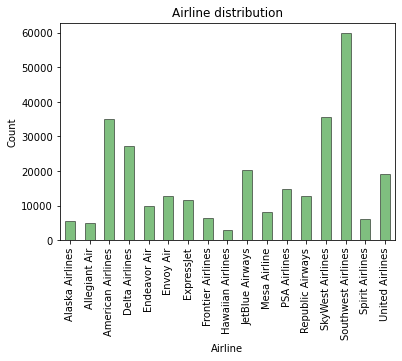

In [6]:
# Get all operators
df_ops = df.filter(regex='OP_CARRIER')
df_ops = df_ops.sum()[1:]

# Get labels
labs = []
lst_idx = list(df_ops.index)
for i in range(len(lst_idx)):
    labs.append(lst_idx[i].replace('OP_CARRIER_', ''))

# Set labels as index
df_ops = df_ops.set_axis(labs)
df_ops.plot.bar(color='green', alpha=0.5, edgecolor='black')
plt.title('Airline distribution')
plt.xlabel('Airline')
plt.ylabel('Count');

> We see that Soutwest, SkyWest, Delta and American Airlines are the most used airlines

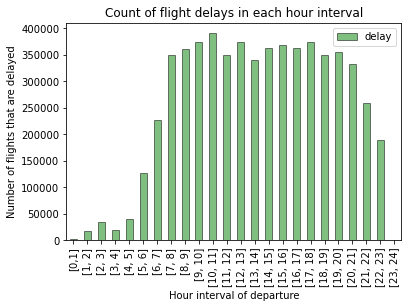

In [7]:
delays = df[['CARRIER_DELAY', 'DEP_TIME']].loc['2018-01-01':'2018-04-01']
delays['DEP_TIME'] = delays['DEP_TIME'].astype(int)
delays['DEP_TIME'] = pd.to_datetime(delays['DEP_TIME'], format="%H", exact = False).dt.hour # Convert to the hour we are in

# Group by delays
labels=["[0,1]", "[1, 2]", "[2, 3]", "[3, 4]", "[4, 5]", "[5, 6]",  "[6, 7]", "[7, 8]", "[8, 9]", "[9, 10]", "[10, 11]", "[11, 12]", "[12, 13]", "[13, 14]", "[14, 15]", "[15, 16]", "[16, 17]", "[17, 18]", "[18, 19]", "[19, 20]", "[20, 21]", "[21, 22]", "[22, 23]", "[23, 24]"] # labels
bins= np.arange(1,26) # intervals
X_dep = delays.copy() # Copy data frame
X_cut = pd.cut(delays['DEP_TIME'], bins=bins, labels=labels, right=False) # cut dataframe
X_dep['dep_group'] = X_cut # Add temp_group

# Create new data frame
cols = ['delay']
df_dep = pd.DataFrame(index=labels, columns=cols)

# take values
values = X_dep.groupby(['dep_group', 'CARRIER_DELAY']).size()


# Loop
for idx, t in enumerate(labels):
    # Assign total number of crimes
    df_dep.delay[idx] = X_dep[X_dep.dep_group == t]['CARRIER_DELAY'].sum()
    

# Add column and reset index
df_dep['dep_group'] = labels
df_dep = df_dep.reset_index().drop('index', axis=1)

# Plot the data frame in each group
df_dep.set_index('dep_group', inplace=True)
ax = df_dep.plot.bar(color='green', alpha=0.5, edgecolor='black')
ax.set_xlabel('Hour interval of departure')
ax.set_ylabel('Number of flights that are delayed')
ax.set_title('Count of flight delays in each hour interval');

In [55]:
delays = df[['CARRIER_DELAY', 'DEP_TIME']].loc['2018-01-01':'2018-04-01']
delays['DEP_TIME'] = delays['DEP_TIME'].astype(int)

# Change so we get correct times
cor_times = []
for i in range(len(delays['DEP_TIME'])):
    if delays['DEP_TIME'].iloc[i] < 100:
        cor_times.append(0)
    elif delays['DEP_TIME'].iloc[i] >= 100 and delays['DEP_TIME'].iloc[i] < 200:
        cor_times.append(1)
    elif delays['DEP_TIME'].iloc[i] >= 200 and delays['DEP_TIME'].iloc[i] < 300 :
        cor_times.append(2)
    elif delays['DEP_TIME'].iloc[i] >= 300 and delays['DEP_TIME'].iloc[i] < 400 :
        cor_times.append(3)
    elif delays['DEP_TIME'].iloc[i] >= 400 and delays['DEP_TIME'].iloc[i] < 500 :
        cor_times.append(4)
    elif delays['DEP_TIME'].iloc[i] >= 500 and delays['DEP_TIME'].iloc[i] < 600 :
        cor_times.append(5)
    elif delays['DEP_TIME'].iloc[i] >= 600 and delays['DEP_TIME'].iloc[i] < 700 :
        cor_times.append(6)
    elif delays['DEP_TIME'].iloc[i] >= 700 and delays['DEP_TIME'].iloc[i] < 800 :
        cor_times.append(7)
    elif delays['DEP_TIME'].iloc[i] >= 800 and delays['DEP_TIME'].iloc[i] < 900 :
        cor_times.append(8)
    elif delays['DEP_TIME'].iloc[i] >= 900 and delays['DEP_TIME'].iloc[i] < 1000 :
        cor_times.append(9)
    elif delays['DEP_TIME'].iloc[i] >= 1000 and delays['DEP_TIME'].iloc[i] < 1100 :
        cor_times.append(10)
    elif delays['DEP_TIME'].iloc[i] >= 1100 and delays['DEP_TIME'].iloc[i] < 1200 :
        cor_times.append(11)
    elif delays['DEP_TIME'].iloc[i] >= 1200 and delays['DEP_TIME'].iloc[i] < 1300 :
        cor_times.append(12)
    elif delays['DEP_TIME'].iloc[i] >= 1300 and delays['DEP_TIME'].iloc[i] < 1400 :
        cor_times.append(13)
    elif delays['DEP_TIME'].iloc[i] >= 1400 and delays['DEP_TIME'].iloc[i] < 1500 :
        cor_times.append(14)
    elif delays['DEP_TIME'].iloc[i] >= 1500 and delays['DEP_TIME'].iloc[i] < 1600 :
        cor_times.append(15)
    elif delays['DEP_TIME'].iloc[i] >= 1600 and delays['DEP_TIME'].iloc[i] < 1700 :
        cor_times.append(16)
    elif delays['DEP_TIME'].iloc[i] >= 1700 and delays['DEP_TIME'].iloc[i] < 1800 :
        cor_times.append(17)
    elif delays['DEP_TIME'].iloc[i] >= 1800 and delays['DEP_TIME'].iloc[i] < 1900 :
        cor_times.append(18)
    elif delays['DEP_TIME'].iloc[i] >= 1900 and delays['DEP_TIME'].iloc[i] < 2000 :
        cor_times.append(19)
    elif delays['DEP_TIME'].iloc[i] >= 2000 and delays['DEP_TIME'].iloc[i] < 2100 :
        cor_times.append(20)
    elif delays['DEP_TIME'].iloc[i] >= 2100 and delays['DEP_TIME'].iloc[i] < 2200 :
        cor_times.append(21)
    elif delays['DEP_TIME'].iloc[i] >= 2200 and delays['DEP_TIME'].iloc[i] < 2300 :
        cor_times.append(22)
    elif delays['DEP_TIME'].iloc[i] >= 2300 and delays['DEP_TIME'].iloc[i] < 2400 :
        cor_times.append(23)



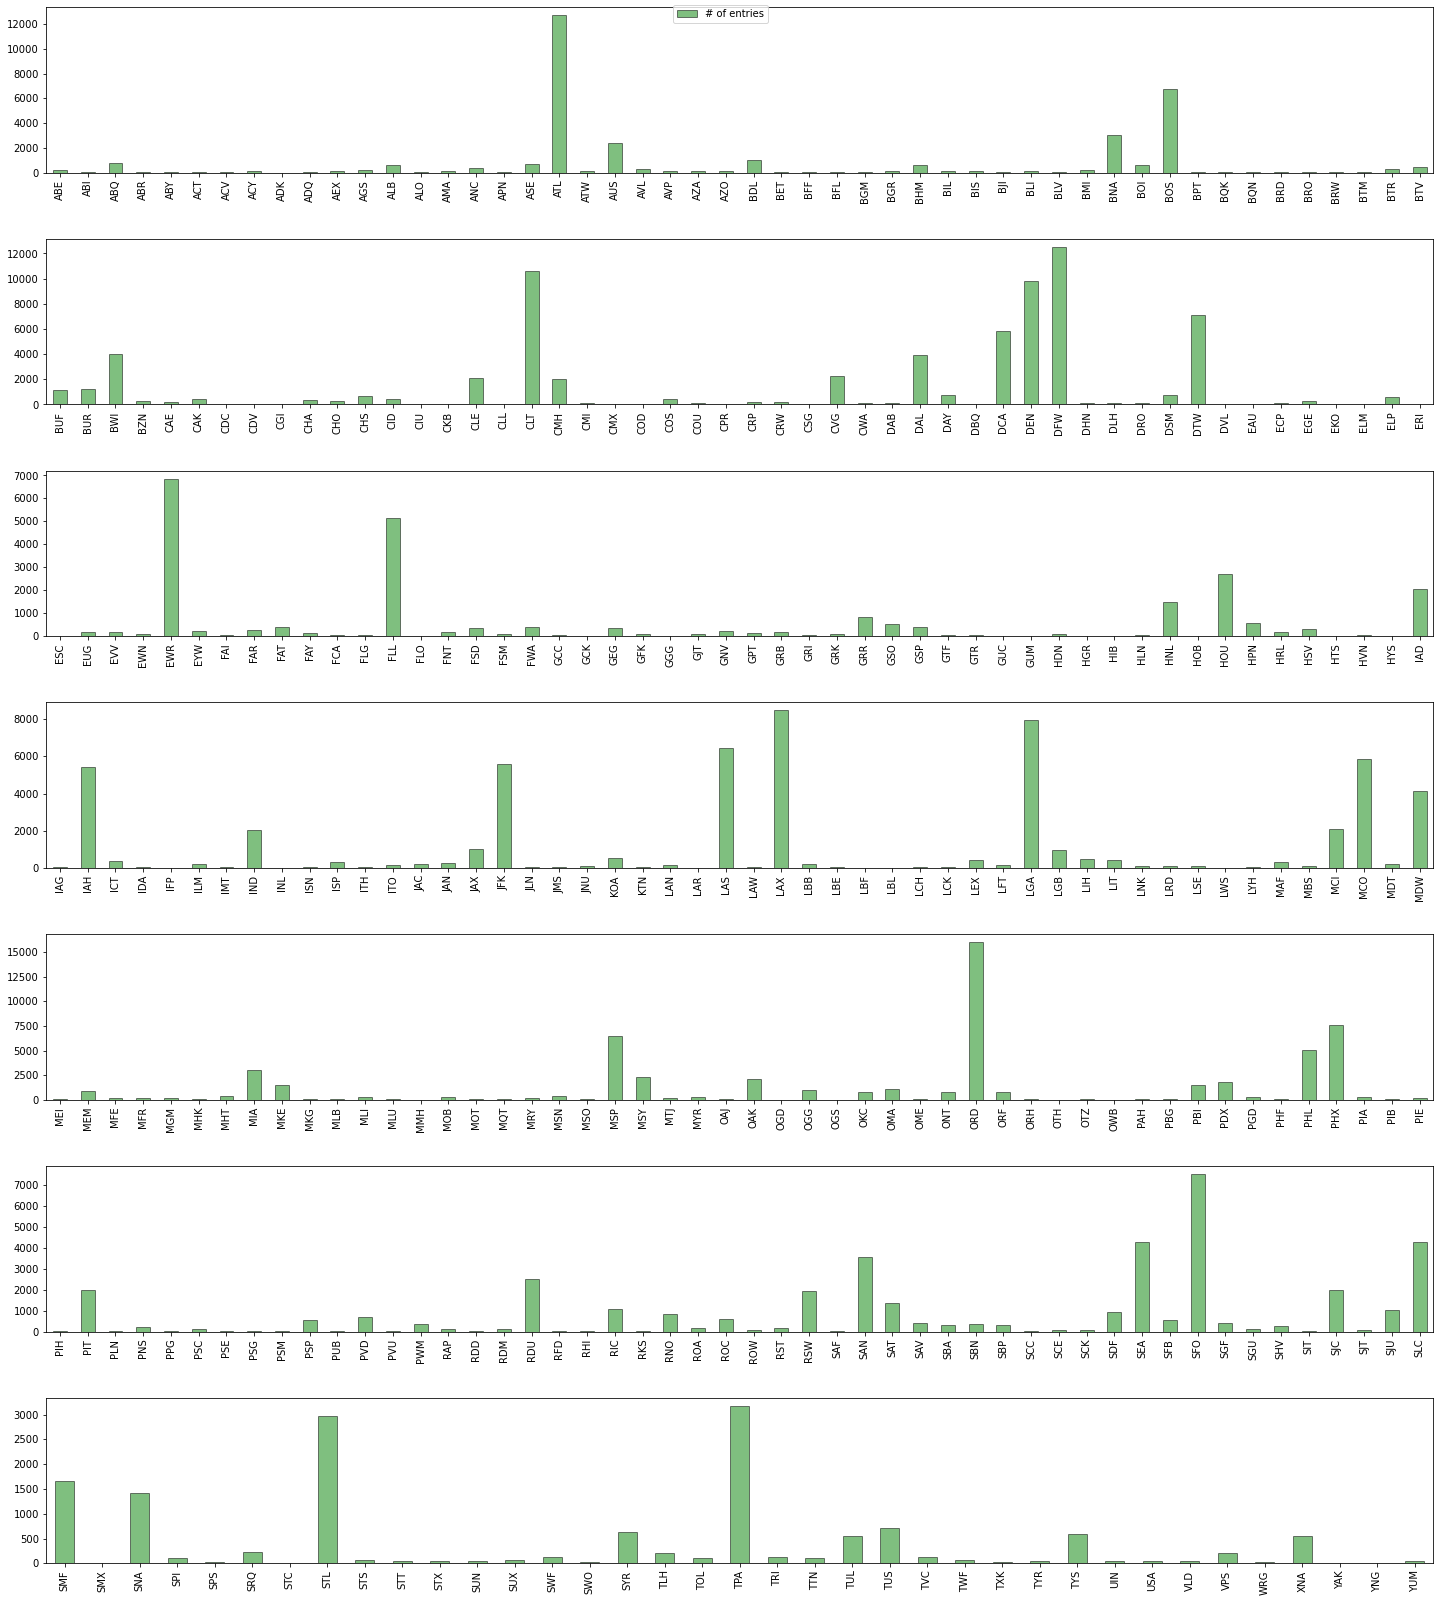

In [30]:
# Number of flights from origin
df_orig = df.filter(regex='ORIGIN')
df_orig = df_orig.sum()

# Get labels
labs = []
lst_idx = list(df_orig.index)
for i in range(len(lst_idx)):
    labs.append(lst_idx[i].replace('ORIGIN_', ''))

# Set labels as index

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(20,20))
fig.tight_layout()
# set the spacing between subplots
plt.subplots_adjust(top = 1.1,
                    hspace=0.4)

ax = ax.ravel()
df_orig = df_orig.set_axis(labs)
df_orig[:50].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[0])

df_orig[50:100].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[1])

df_orig[100:150].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[2])

df_orig[150:200].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[3])

df_orig[200:250].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[4])

df_orig[250:300].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[5])

df_orig[300:350].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[6])

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')


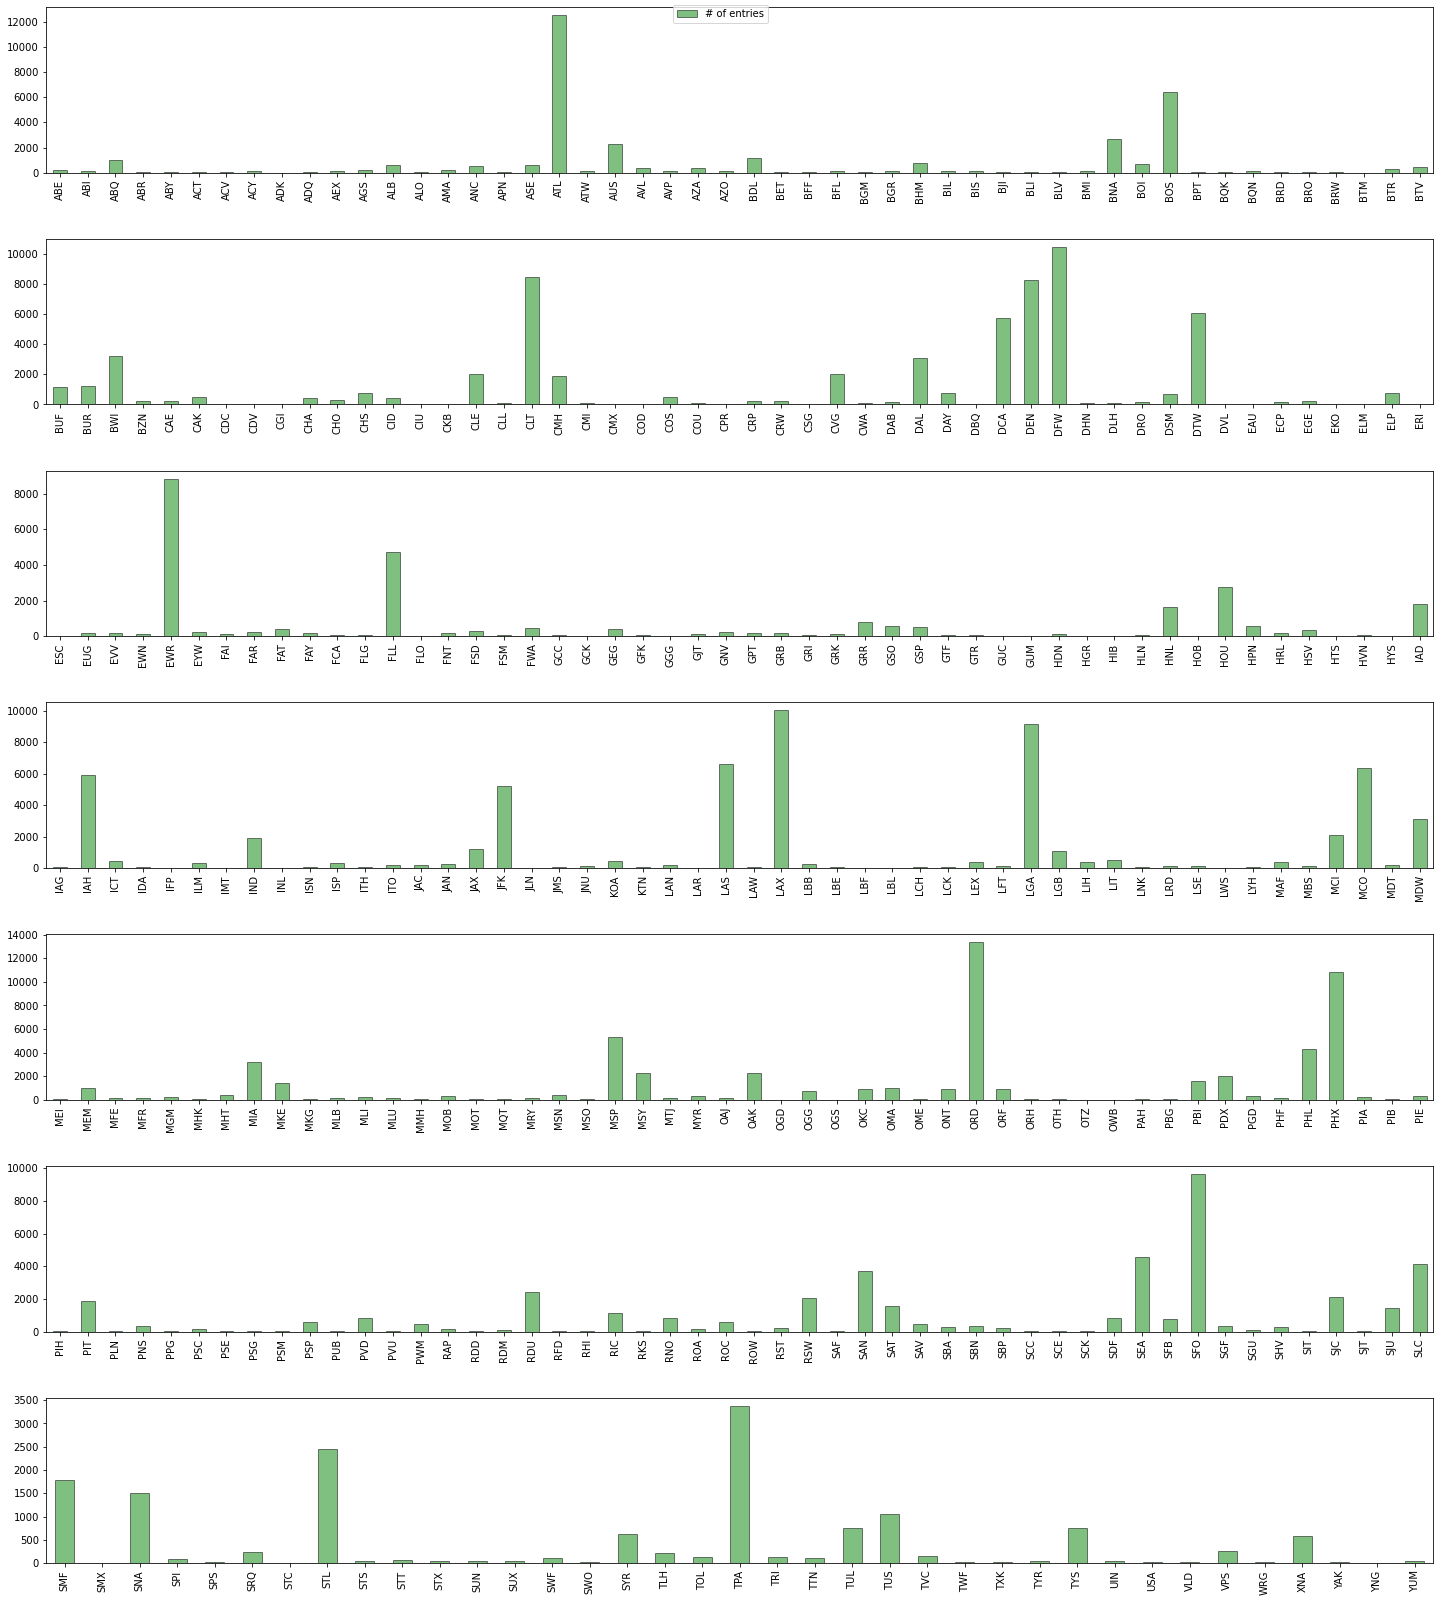

In [31]:
# Number of flights to destination
df_dest = df.filter(regex='DEST')
df_dest = df_dest.sum()

# Get labels
labs = []
lst_idx = list(df_dest.index)
for i in range(len(lst_idx)):
    labs.append(lst_idx[i].replace('DEST_', ''))

# Set labels as index

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(20,20))
fig.tight_layout()
# set the spacing between subplots
plt.subplots_adjust(top = 1.1,
                    hspace=0.4)

ax = ax.ravel()
df_dest = df_dest.set_axis(labs)
df_dest[:50].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[0])

df_dest[50:100].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[1])

df_dest[100:150].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[2])

df_dest[150:200].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[3])

df_dest[200:250].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[4])

df_dest[250:300].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[5])

df_dest[300:350].plot.bar(color='green', alpha=0.5, edgecolor='black', rot=90, label='# of entries', ax=ax[6])

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

### Of course flights from origin and flights to destinations are the same plots, as planes flying to one place also leaves that place. 

In [41]:
df_dest[df_dest > 1000]

ABQ     1033
ATL    12543
AUS     2281
BDL     1184
BNA     2713
BOS     6446
BUF     1154
BUR     1222
BWI     3229
CLE     2012
CLT     8450
CMH     1890
CVG     1994
DAL     3052
DCA     5707
DEN     8247
DFW    10471
DTW     6045
EWR     8850
FLL     4721
HNL     1616
HOU     2768
IAD     1821
IAH     5903
IND     1898
JAX     1194
JFK     5238
LAS     6636
LAX    10029
LGA     9129
LGB     1058
MCI     2120
MCO     6344
MDW     3140
MIA     3177
MKE     1441
MSP     5305
MSY     2258
OAK     2233
ORD    13370
PBI     1627
PDX     2047
PHL     4345
PHX    10861
PIT     1843
RDU     2420
RIC     1135
RSW     2060
SAN     3690
SAT     1593
SEA     4589
SFO     9653
SJC     2118
SJU     1422
SLC     4149
SMF     1797
SNA     1501
STL     2461
TPA     3383
TUS     1049
dtype: int64